In [1]:
!pip3 install numpy scipy patsy pandas
!pip3 install statsmodels


In [2]:
!pip install fbprophet

In [3]:
!git clone https://github.com/rmcelfresh/IST718FinalProject/

Cloning into 'IST718FinalProject'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 31 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (31/31), done.


In [4]:
# import packages for analysis and modeling
import pandas as pd  # data frame operations
!python3.6 -m pip install scipy==1.2 --upgrade

from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np  # arrays and math functions
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt  # 2D plotting
from fbprophet import Prophet

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING
%matplotlib inline

     |████████████████████████████████| 26.6MB 1.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [5]:
missing_values = ["n/a", "na", "--"]
twitter_polarity = pd.read_csv("IST718FinalProject/reviews_Polarity.csv", na_values = missing_values)
twitter_polarity.head()

,Unnamed: 0,Movie,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,FileName
0,40,AgeofUltron,1.13203E+18,Fri May 24 21:01:14 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",Avengers will return.\n#Avengers\n#AvengersAge...,return AvengersAgeOfUltron,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0000,0.0,AgeofUltron_data
1,41,AgeofUltron,1.13202E+18,Fri May 24 20:35:11 +0000 2019,"<a href=""http://twitter.com/download/android"" ...","""Fury, you son of a bitch""\n""Ooh, you kiss you...",Fury son bitch Ooh kiss mother mouth lAnGu...,"Sentiment(polarity=0.0, subjectivity=0.0)",-0.6908,0.0,AgeofUltron_data
2,42,AgeofUltron,1.13202E+18,Fri May 24 20:32:47 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",fuRy YoU sOn Of A BitCh #AvengersAgeOfUltron,fuRy YoU sOn Of A BitCh AvengersAgeOfUltron,"Sentiment(polarity=0.0, subjectivity=0.0)",-0.8176,0.0,AgeofUltron_data
3,43,AgeofUltron,1.13201E+18,Fri May 24 19:59:56 +0000 2019,"<a href=""http://twitter.com/download/android"" ...",RT @Marvel_Informer: Who else got goosebumps f...,Marvel_Informer Who else got goosebumps lines...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0000,0.0,AgeofUltron_data
4,44,AgeofUltron,1.13201E+18,Fri May 24 19:32:13 +0000 2019,"<a href=""http://twitter.com/download/iphone"" r...",RT @Marvel_Informer: Who else got goosebumps f...,Marvel_Informer Who else got goosebumps lines...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0000,0.0,AgeofUltron_data


In [6]:
pd.pivot_table(twitter_polarity, values='polarity', columns='Movie', aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')

Movie,AgeofUltron,Antman,Antmanthewasp,Aquaman,AvengersEndgame,AvengersInfinityWar,BlackPanther,CivilWar,DawnofJustice,DoctorStrange,GuardiansoftheGalaxy,JusticeLeague,RogueOne,Shazam,Solo,SpidermanFarfromhome,SpidermanHomecoming,SuicideSquad,TheForceAwakens,TheLastJedi,ThorRagnarok,WonderWoman
polarity,0.145708,-0.026944,0.131781,0.182843,0.089621,0.139388,0.203379,0.015877,0.304407,0.161916,0.24203,0.247213,0.051062,0.240115,0.3114,0.159506,0.159455,0.039568,0.235119,0.147334,0.167975,0.245941


In [7]:
missing_values = ["n/a", "na", "--"]
RT_polarity = pd.read_csv("IST718FinalProject/rotten_reviews_Polarity.csv", na_values = missing_values)
RT_polarity.head()

,Unnamed: 0,Movie,FileName,Field_1,text,polarity
0,0,AgeofUltron,AgeofUltron_rm,0,"Fans of the franchise will be pleased, but tho...",0.2382
1,1,AgeofUltron,AgeofUltron_rm,1,"""Avengers: Age of Ultron"" is a sometimes daffy...",0.8813
2,2,AgeofUltron,AgeofUltron_rm,2,"More does not necessarily equal better; here, ...",-0.4031
3,3,AgeofUltron,AgeofUltron_rm,3,"The sharp, interpersonal dramedy that made the...",-0.1655
4,4,AgeofUltron,AgeofUltron_rm,4,"For the most part, ""Avengers: Age of Ultron"" i...",0.0000


In [8]:
t_polarity = twitter_polarity.groupby(['Movie'])['polarity'].mean()
t_polarity = pd.DataFrame(t_polarity)
t_polarity = t_polarity.reset_index(drop=False)
t_polarity

,Movie,polarity
0,AgeofUltron,0.145708
1,Antman,-0.026944
2,Antmanthewasp,0.131781
3,Aquaman,0.182843
4,AvengersEndgame,0.089621
5,AvengersInfinityWar,0.139388
6,BlackPanther,0.203379
7,CivilWar,0.015877
8,DawnofJustice,0.304407
9,DoctorStrange,0.161916


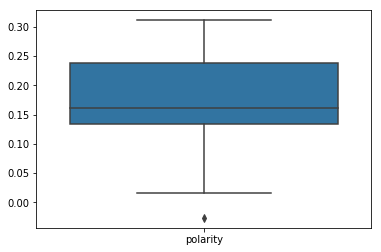

In [9]:
# Boxplot
sns.boxplot(data=t_polarity)

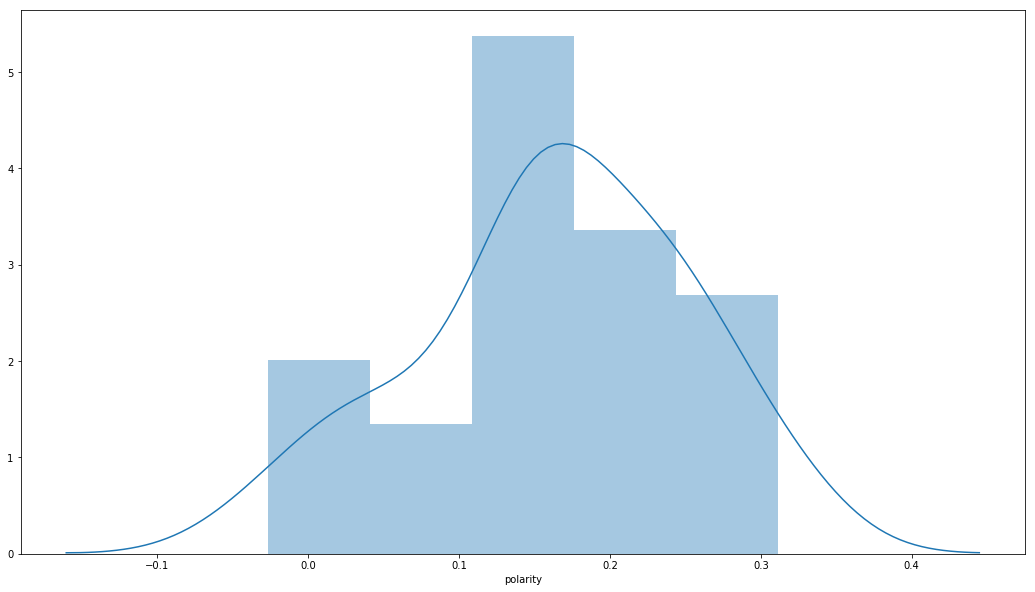

In [10]:
plt.figure(figsize=(18, 10))
sns.distplot(t_polarity.polarity)

In [11]:
RT_polarity = RT_polarity.groupby(['Movie'])['polarity'].mean()
RT_polarity = pd.DataFrame(RT_polarity)
RT_polarity = RT_polarity.reset_index(drop=False)
RT_polarity

,Movie,polarity
0,AgeofUltron,0.325920
1,Antman,0.447856
2,Antmanthewasp,0.483780
3,Aquaman,0.323176
4,AvengersEndgame,0.464424
5,AvengersInfinityWar,0.155448
6,BlackPanther,0.441759
7,CivilWar,0.267807
8,DawnofJustice,0.090210
9,DoctorStrange,0.379982


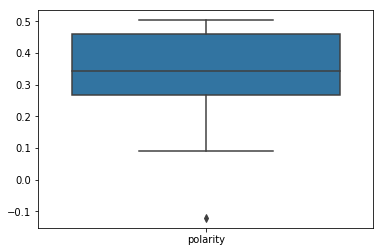

In [12]:
# Boxplot
sns.boxplot(data=RT_polarity)

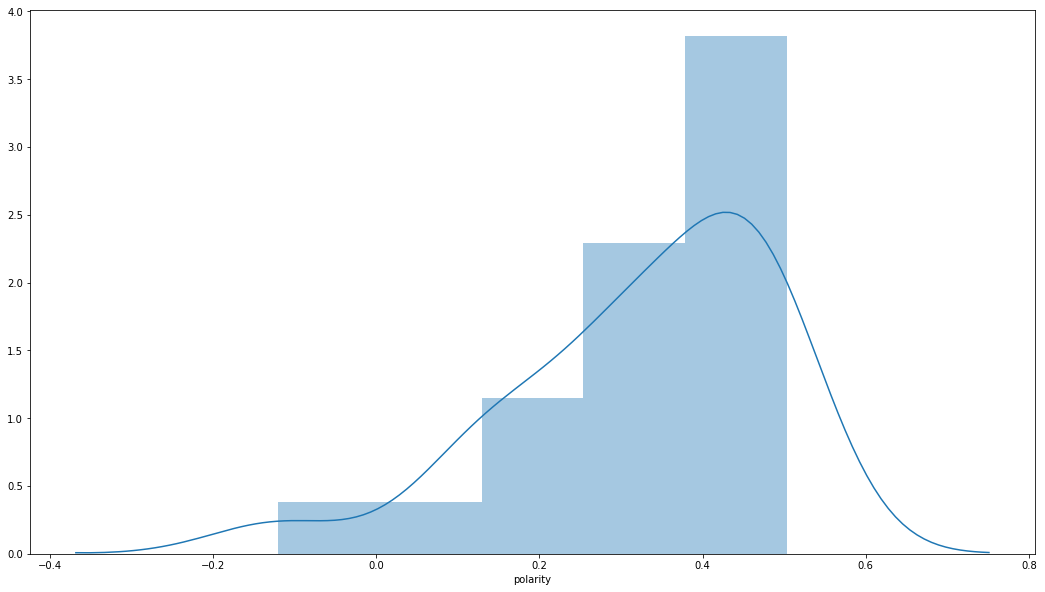

In [13]:
plt.figure(figsize=(18, 10))
sns.distplot(RT_polarity.polarity)

In [14]:
missing_values = ["n/a", "na", "--"]
BudgetAndResults = pd.read_csv("IST718FinalProject/BudgetAndResults.csv", na_values = missing_values, encoding = "ISO-8859-1")
BudgetAndResults.head()

,FullMovieName,Month,Day,Year,Budget,Domestic Gross,Worldwide Gross,Universe,Movie
0,Avengers: Age of Ultron,May,1,2015,495000000,459005868,1405403694,MCU,AgeofUltron
1,Ant-man,June,29,2015,160000000,180202163,519311965,MCU,Antman
2,Aquaman,Dec,21,2018,180000000,335061807,1147761807,MCU,Antman
3,Ant-man and the wasp,July,6,2018,162000000,216648740,622674139,MCU,Antmanthewasp
4,Avengers Endgame,Apr,26,2019,365000000,827811359,2734786099,MCU,AvengersEndgame


In [0]:
finalDF = pd.merge(left=BudgetAndResults, right = RT_polarity, how='left', left_on='Movie', right_on='Movie')
finalDF = pd.merge(left=finalDF, right = t_polarity, how='left', left_on='Movie', right_on='Movie')


In [16]:
finalDF

,FullMovieName,Month,Day,Year,Budget,Domestic Gross,Worldwide Gross,Universe,Movie,polarity_x,polarity_y
0,Avengers: Age of Ultron,May,1,2015,495000000,459005868,1405403694,MCU,AgeofUltron,0.325920,0.145708
1,Ant-man,June,29,2015,160000000,180202163,519311965,MCU,Antman,0.447856,-0.026944
2,Aquaman,Dec,21,2018,180000000,335061807,1147761807,MCU,Antman,0.447856,-0.026944
3,Ant-man and the wasp,July,6,2018,162000000,216648740,622674139,MCU,Antmanthewasp,0.483780,0.131781
4,Avengers Endgame,Apr,26,2019,365000000,827811359,2734786099,MCU,AvengersEndgame,0.464424,0.089621
5,Avengers InfinityWar,Apr,27,2018,385000000,678815482,2048359754,MCU,AvengersInfinityWar,0.155448,0.139388
6,Black Panther,Feb,16,2018,200000000,530851601,944951601,MCU,BlackPanther,0.441759,0.203379
7,Captain America: Civil War,May,6,2016,250000000,408084349,1153304495,MCU,CivilWar,0.267807,0.015877
8,Batman v Superman: Dawn of Justice,Mar,25,2016,250000000,330360194,868160194,DCEU,DawnofJustice,0.090210,0.304407
9,Doctor Strange,Nov,4,2016,165000000,232641920,677541920,MCU,DoctorStrange,0.379982,0.161916


In [17]:
print("finalDF ",list(finalDF))

finalDF  ['FullMovieName', 'Month', 'Day', 'Year', 'Budget', 'Domestic Gross', 'Worldwide Gross', 'Universe', 'Movie', 'polarity_x', 'polarity_y']


In [0]:
finalDF.columns = ['FullMovieName', 'Month', 'Day', 'Year', 'Budget', 'DomesticGross', 'WorldwideGross', 'Universe', 'Movie', 'polarity_rt', 'polarity_twitter']

In [19]:
finalDF

,FullMovieName,Month,Day,Year,Budget,DomesticGross,WorldwideGross,Universe,Movie,polarity_rt,polarity_twitter
0,Avengers: Age of Ultron,May,1,2015,495000000,459005868,1405403694,MCU,AgeofUltron,0.325920,0.145708
1,Ant-man,June,29,2015,160000000,180202163,519311965,MCU,Antman,0.447856,-0.026944
2,Aquaman,Dec,21,2018,180000000,335061807,1147761807,MCU,Antman,0.447856,-0.026944
3,Ant-man and the wasp,July,6,2018,162000000,216648740,622674139,MCU,Antmanthewasp,0.483780,0.131781
4,Avengers Endgame,Apr,26,2019,365000000,827811359,2734786099,MCU,AvengersEndgame,0.464424,0.089621
5,Avengers InfinityWar,Apr,27,2018,385000000,678815482,2048359754,MCU,AvengersInfinityWar,0.155448,0.139388
6,Black Panther,Feb,16,2018,200000000,530851601,944951601,MCU,BlackPanther,0.441759,0.203379
7,Captain America: Civil War,May,6,2016,250000000,408084349,1153304495,MCU,CivilWar,0.267807,0.015877
8,Batman v Superman: Dawn of Justice,Mar,25,2016,250000000,330360194,868160194,DCEU,DawnofJustice,0.090210,0.304407
9,Doctor Strange,Nov,4,2016,165000000,232641920,677541920,MCU,DoctorStrange,0.379982,0.161916


In [0]:
data2=finalDF.copy()

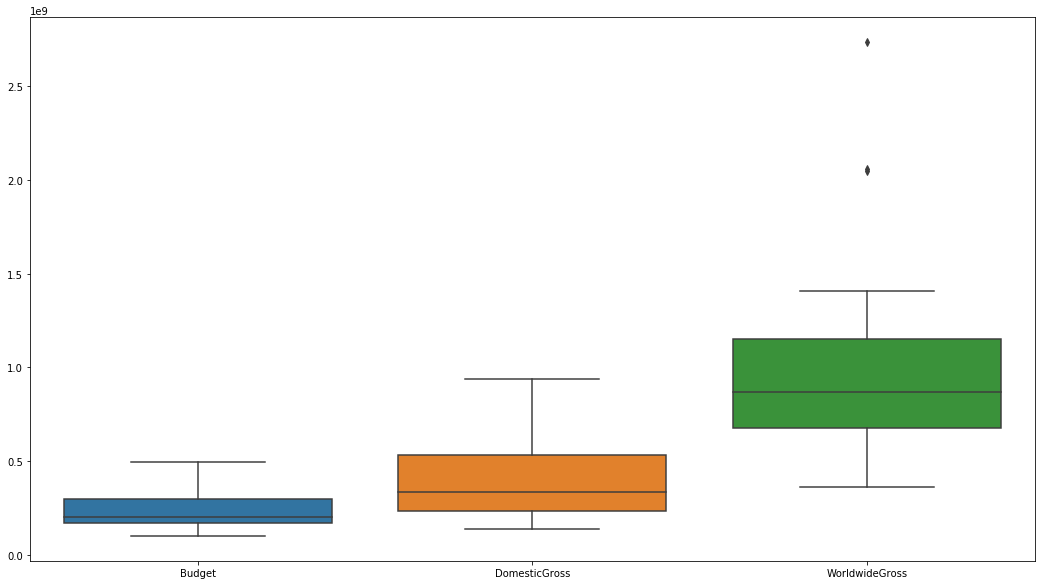

In [21]:
# Pre-format DataFrame
stats_df = data2[['Budget', 'DomesticGross', 'WorldwideGross']]
 
# New boxplot using stats_df
plt.figure(figsize=(18, 10))
sns.boxplot(data=stats_df)

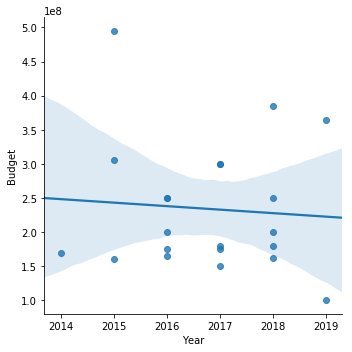

In [22]:
sns.lmplot(x='Year', y='Budget', data=data2)

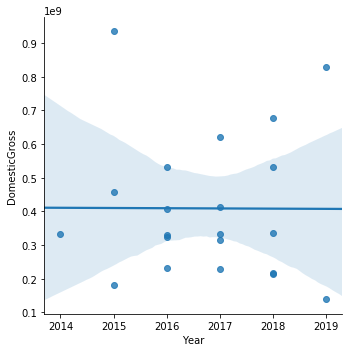

In [23]:
sns.lmplot(x='Year', y='DomesticGross', data=data2)

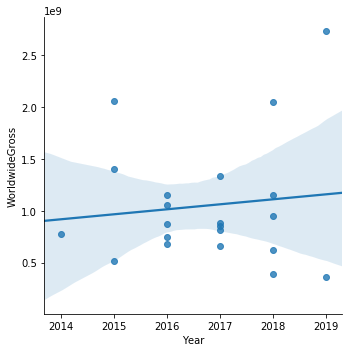

In [24]:
sns.lmplot(x='Year', y='WorldwideGross', data=data2)

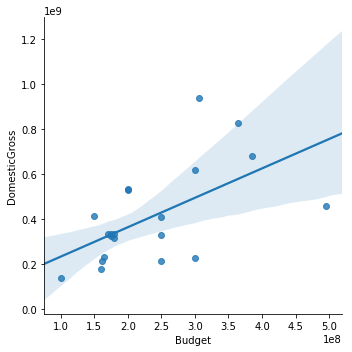

In [25]:
sns.lmplot(x='Budget', y='DomesticGross', data=data2)

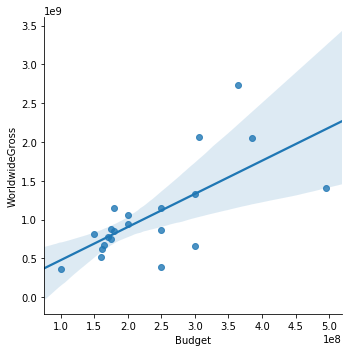

In [26]:
sns.lmplot(x='Budget', y='WorldwideGross', data=data2)

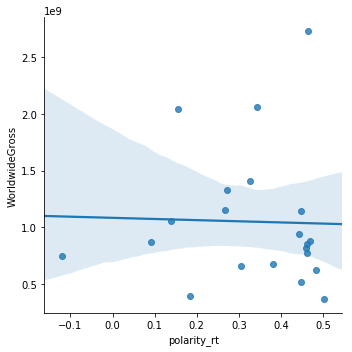

In [27]:
sns.lmplot(x='polarity_rt', y='WorldwideGross', data=data2)

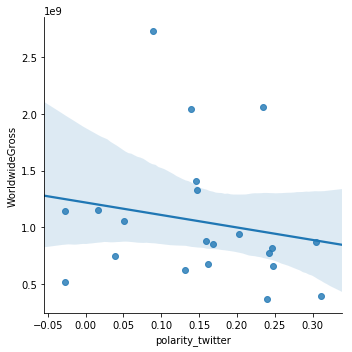

In [28]:
sns.lmplot(x='polarity_twitter', y='WorldwideGross', data=data2)

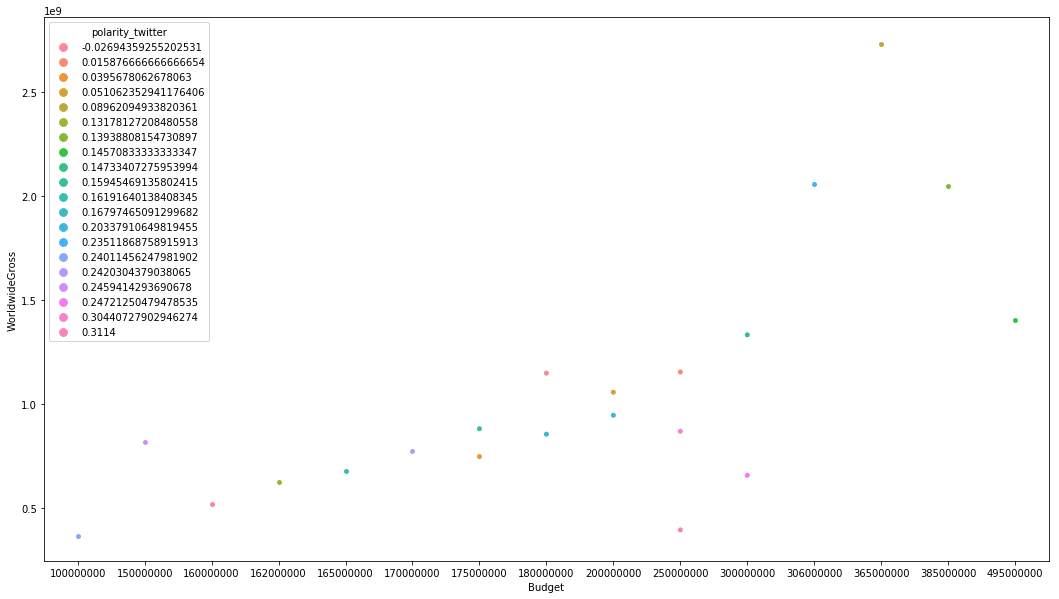

In [29]:
plt.figure(figsize=(18, 10))
sns.swarmplot(x='Budget', y='WorldwideGross', data=data2, 
              hue='polarity_twitter')

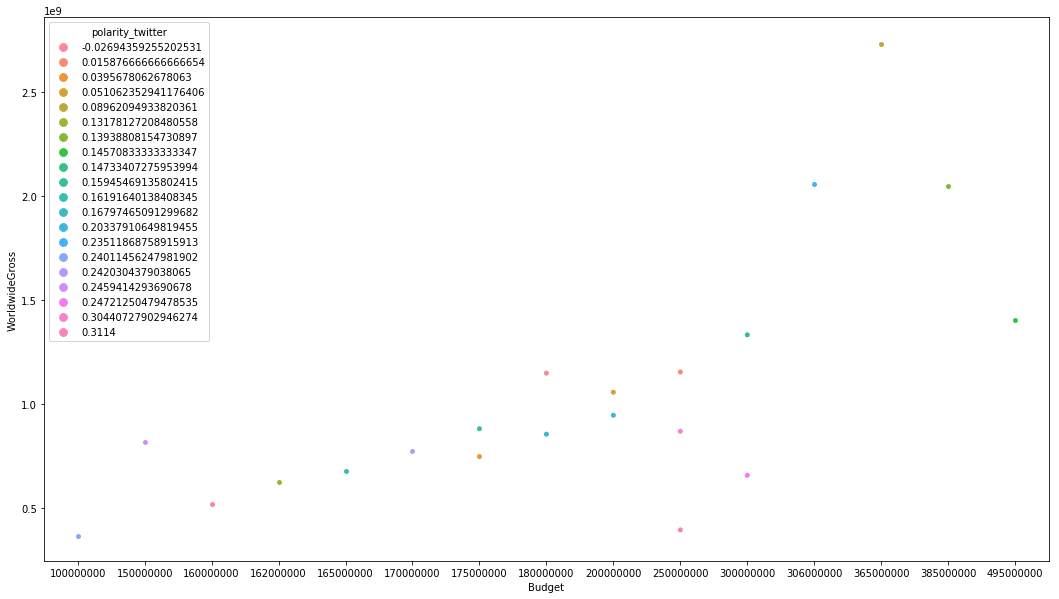

In [30]:
plt.figure(figsize=(18, 10))
sns.swarmplot(x='Budget', y='WorldwideGross', data=data2, 
              hue='polarity_twitter')

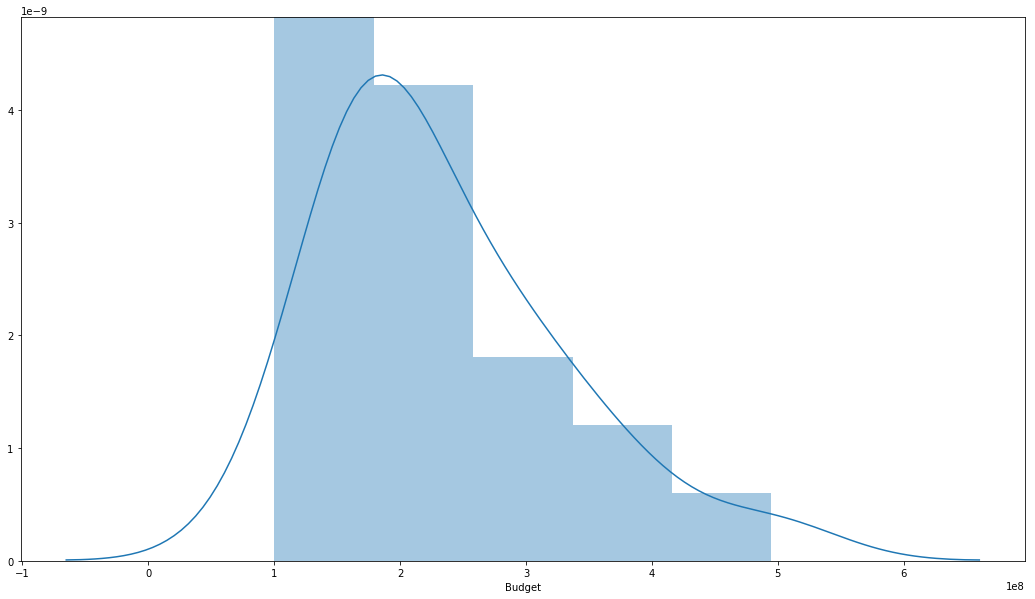

In [31]:
plt.figure(figsize=(18, 10))
sns.distplot(data2.Budget)

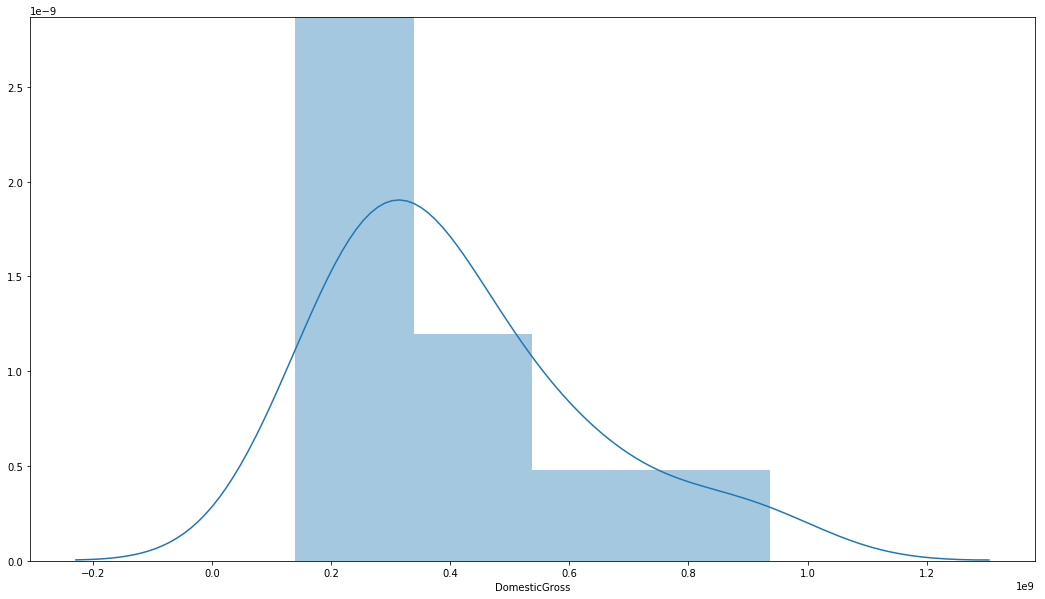

In [32]:
plt.figure(figsize=(18, 10))
sns.distplot(data2.DomesticGross)

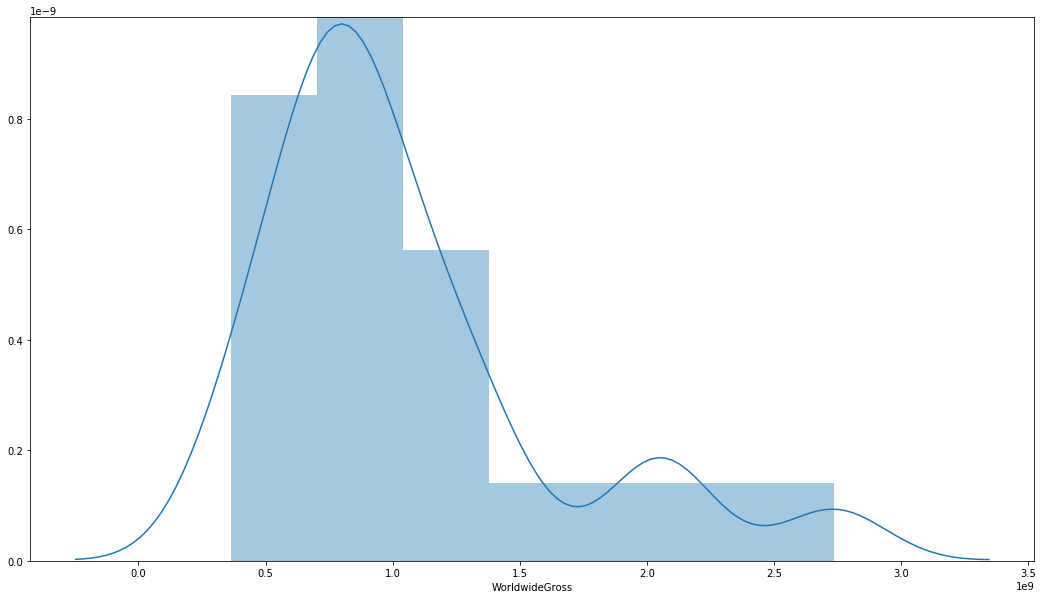

In [33]:
plt.figure(figsize=(18, 10))
sns.distplot(data2.WorldwideGross)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

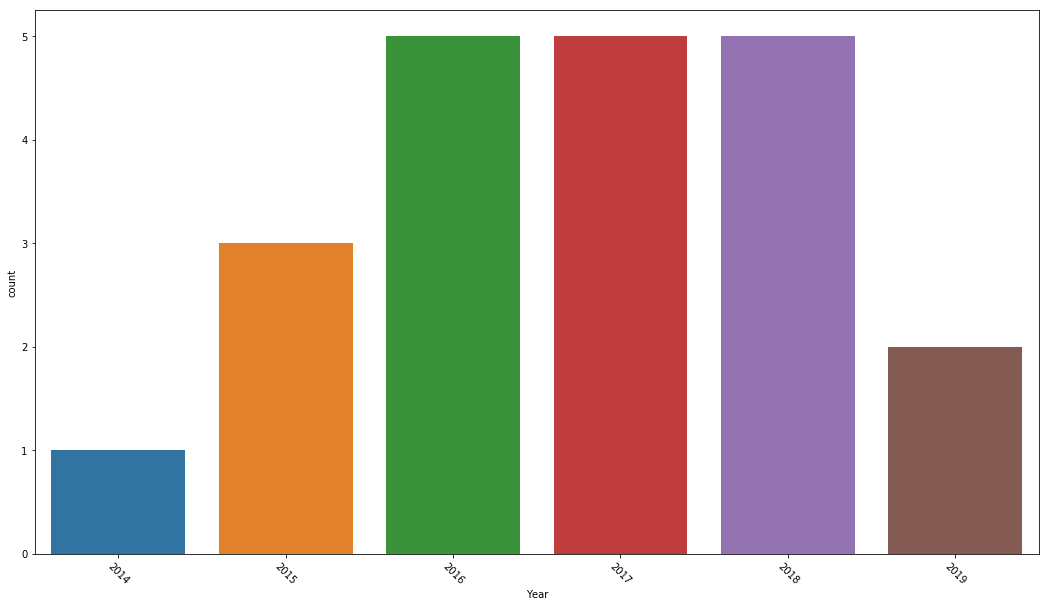

In [34]:
plt.figure(figsize=(18, 10))
sns.countplot(x='Year', data=data2)
 
# Rotate x-labels
plt.xticks(rotation=-45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

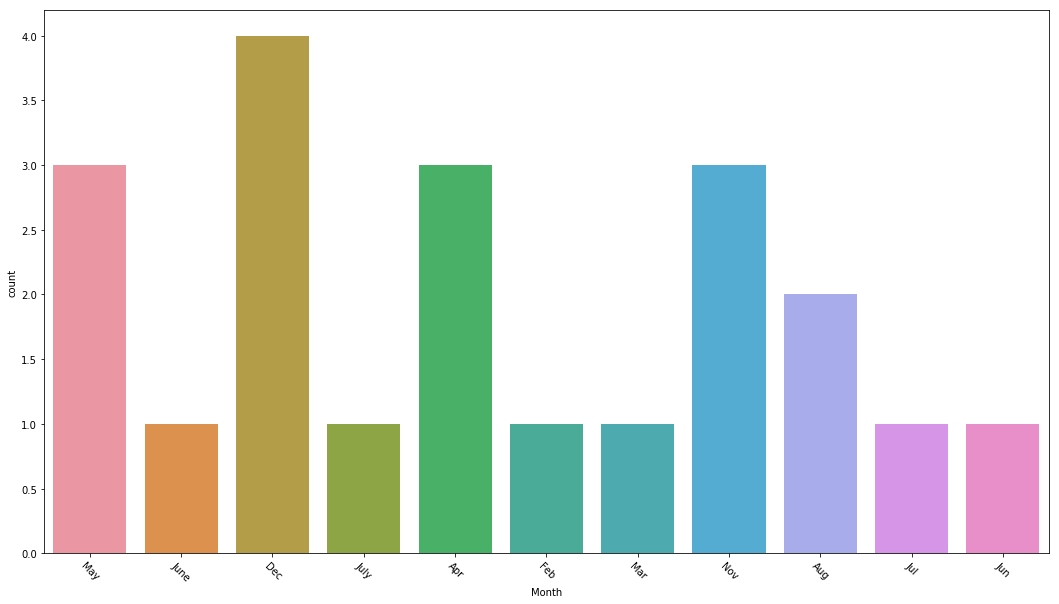

In [35]:
plt.figure(figsize=(18, 10))
sns.countplot(x='Month', data=data2)
 
# Rotate x-labels
plt.xticks(rotation=-45)

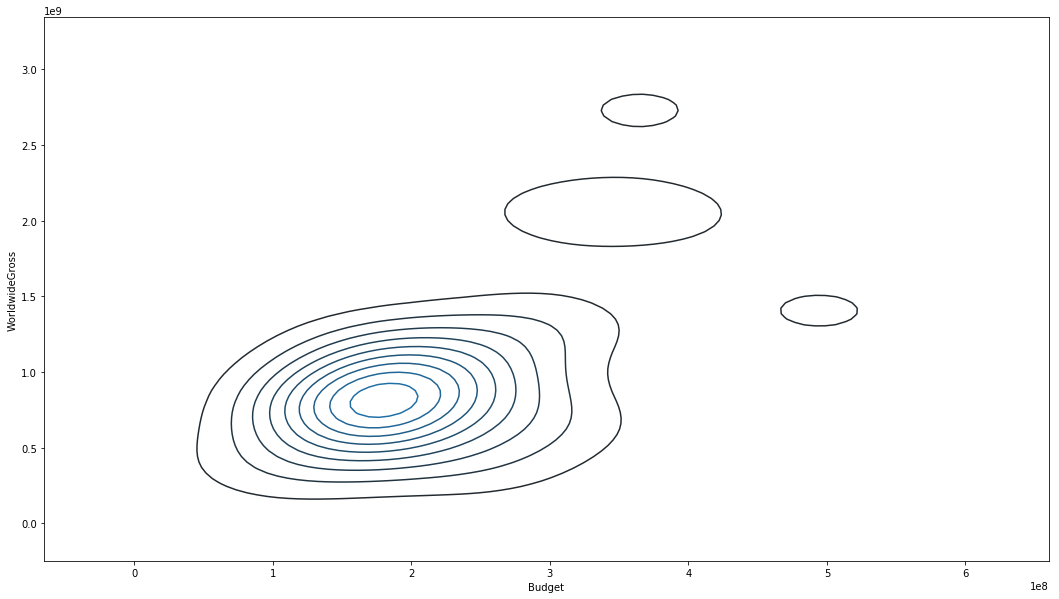

In [36]:
plt.figure(figsize=(18, 10))
sns.kdeplot(data2.Budget, data2.WorldwideGross)

<Figure size 1296x720 with 0 Axes>

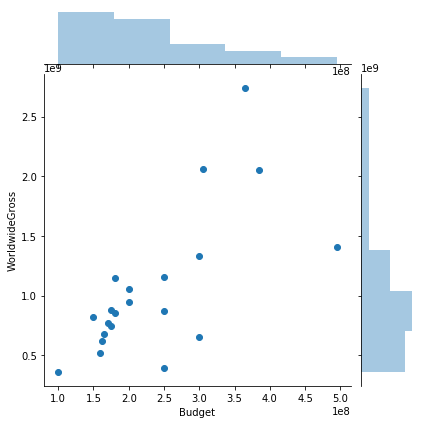

In [37]:
plt.figure(figsize=(18, 10))
sns.jointplot(x='Budget', y='WorldwideGross', data=data2)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



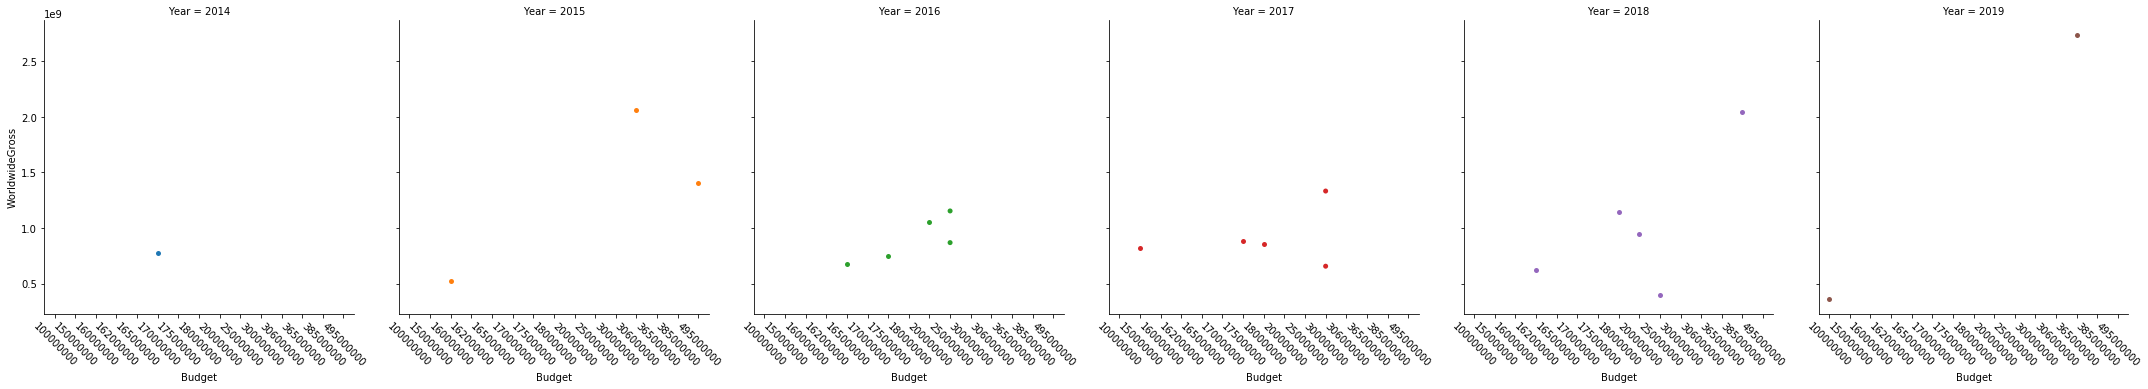

In [38]:
# Factor Plot
g = sns.factorplot(x='Budget', 
                   y='WorldwideGross', 
                   data=data2, 
                   hue='Year',  # Color by Year
                   col='Year',  # Separate by Year
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



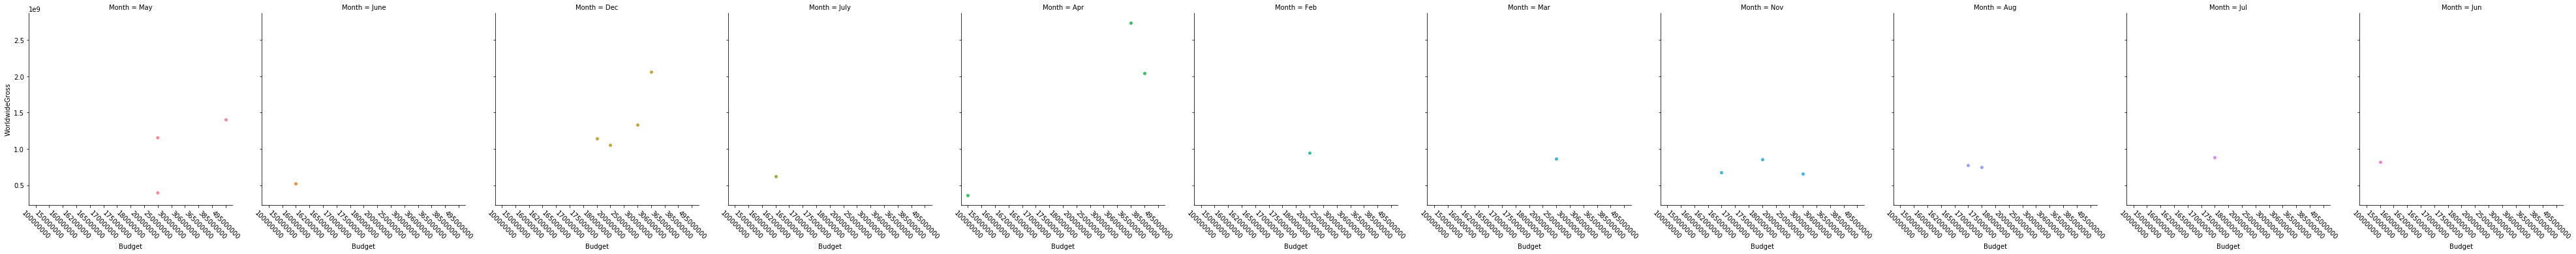

In [39]:
# Factor Plot
g = sns.factorplot(x='Budget', 
                   y='WorldwideGross', 
                   data=data2, 
                   hue='Month',  # Color by Month
                   col='Month',  # Separate by Month
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



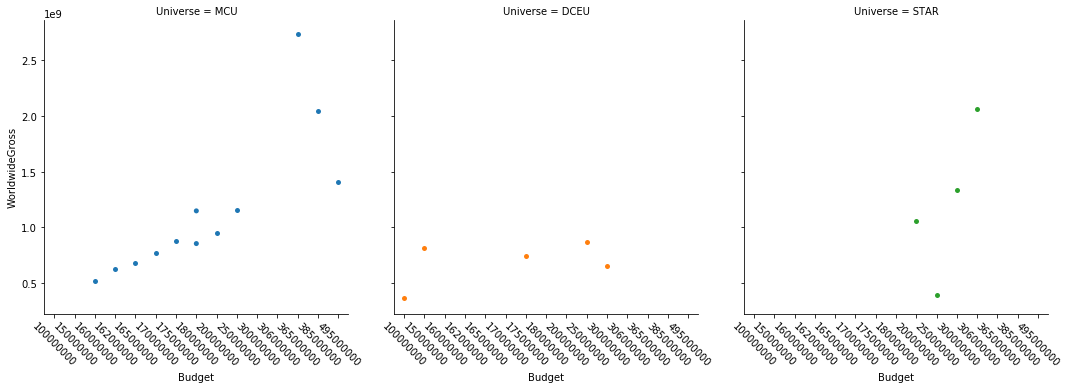

In [40]:
# Factor Plot
g = sns.factorplot(x='Budget', 
                   y='WorldwideGross', 
                   data=data2, 
                   hue='Universe',  # Color by Universe
                   col='Universe',  # Separate by Universe
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

In [41]:
from sklearn.preprocessing import LabelEncoder

# Label encoding ConfAbbr

lb_make = LabelEncoder()
data2["Month_code"] = lb_make.fit_transform(data2["Month"].astype(str))
data2[["Month", "Month_code"]].head()

,Month,Month_code
0,May,9
1,June,7
2,Dec,2
3,July,5
4,Apr,0


In [42]:
# review the size of the dataset
data2.shape

(21, 12)

In [43]:
data2.dtypes


FullMovieName        object
Month                object
Day                   int64
Year                  int64
Budget                int64
DomesticGross         int64
WorldwideGross        int64
Universe             object
Movie                object
polarity_rt         float64
polarity_twitter    float64
Month_code            int64
dtype: object

In [44]:
# Statistical Summary of Numeric Variables
data2.describe()

,Day,Year,Budget,DomesticGross,WorldwideGross,polarity_rt,polarity_twitter,Month_code
count,21.000000,21.000000,2.100000e+01,2.100000e+01,2.100000e+01,21.000000,21.000000,21.000000
mean,12.380952,2016.761905,2.341905e+08,4.090941e+08,1.049987e+09,0.332529,0.153591,4.761905
std,9.340643,1.374946,9.549378e+07,2.128563e+08,5.948439e+08,0.164692,0.100554,3.767025
min,1.000000,2014.000000,1.000000e+08,1.396304e+08,3.630304e+08,-0.120457,-0.026944,0.000000
25%,5.000000,2016.000000,1.700000e+08,2.326419e+08,6.775419e+08,0.267807,0.089621,2.000000
50%,10.000000,2017.000000,2.000000e+08,3.342011e+08,8.681602e+08,0.379982,0.159455,4.000000
75%,18.000000,2018.000000,3.000000e+08,5.308516e+08,1.153304e+09,0.461304,0.240115,9.000000
max,29.000000,2019.000000,4.950000e+08,9.366622e+08,2.734786e+09,0.503318,0.311400,10.000000


In [45]:
# find max amounts
print("Heighest of Budget:       ", data2['Budget'].max())
print("Heighest of Domestic Gross:       ", data2['DomesticGross'].max())
print("Heighest of Worldwide Gross:       ", data2['WorldwideGross'].max())
print("Heighest of Polarity from Twitter:       ", data2['polarity_twitter'].max())
print("Heighest of Polarity from Rotten Tomato:       ", data2['polarity_rt'].max())

Heighest of Budget:        495000000
Heighest of Domestic Gross:        936662225
Heighest of Worldwide Gross:        2734786099
Heighest of Polarity from Twitter:        0.3114
Heighest of Polarity from Rotten Tomato:        0.5033183381088823


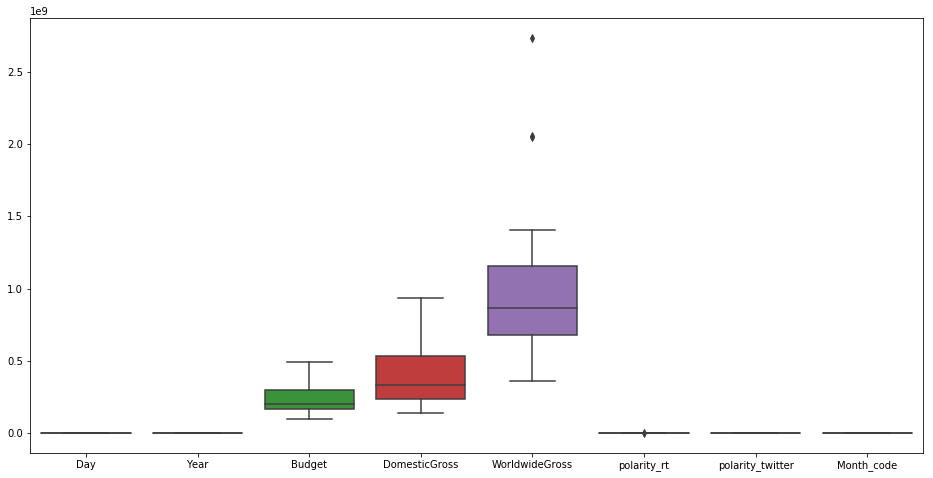

In [46]:
# Boxplot for all
plt.figure(figsize=(16, 8))
sns.boxplot(data=data2)

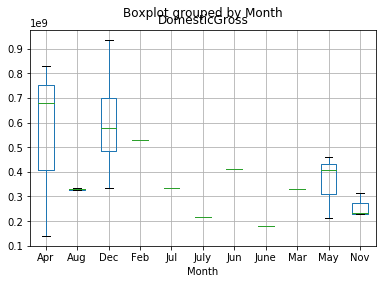

In [47]:
# TotalPay by conference
data2.boxplot(column='DomesticGross', by = 'Month')

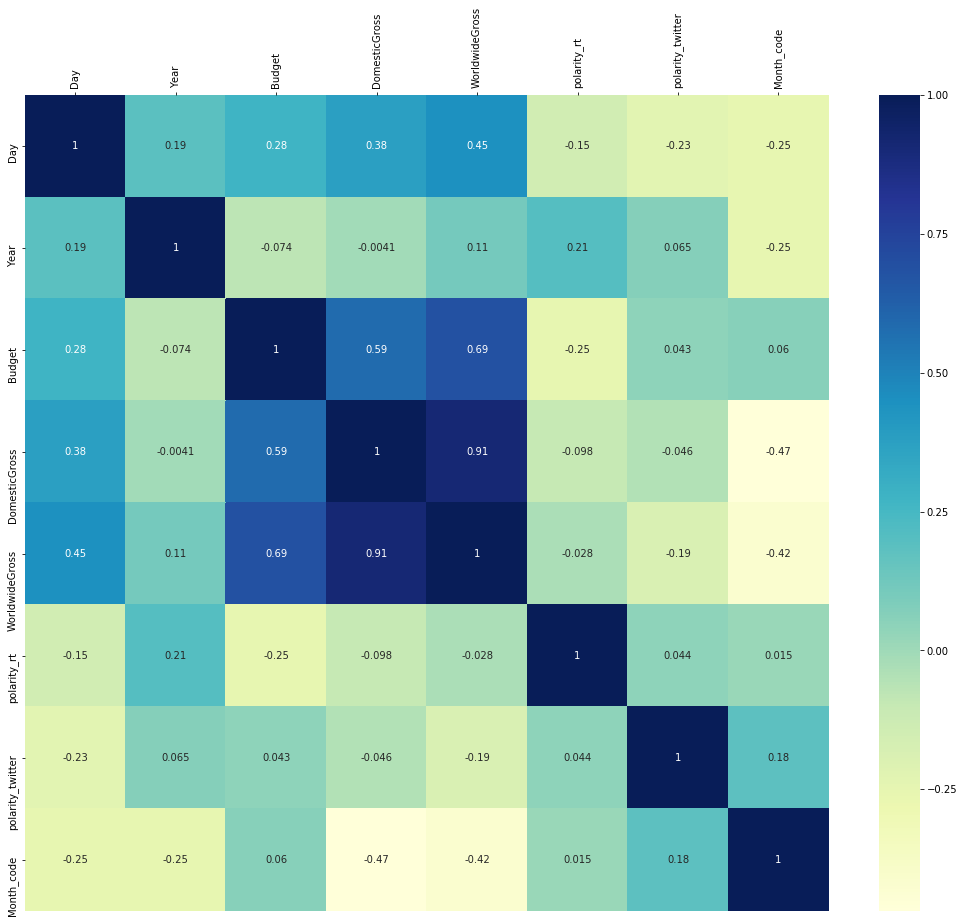

In [48]:
plt.subplots(figsize=(18,15))
hm1 = sns.heatmap(data2.corr(), annot=True, cmap='YlGnBu')
hm1.set_xticklabels(hm1.get_xticklabels(), rotation=90)
hm1.xaxis.set_ticks_position('top')

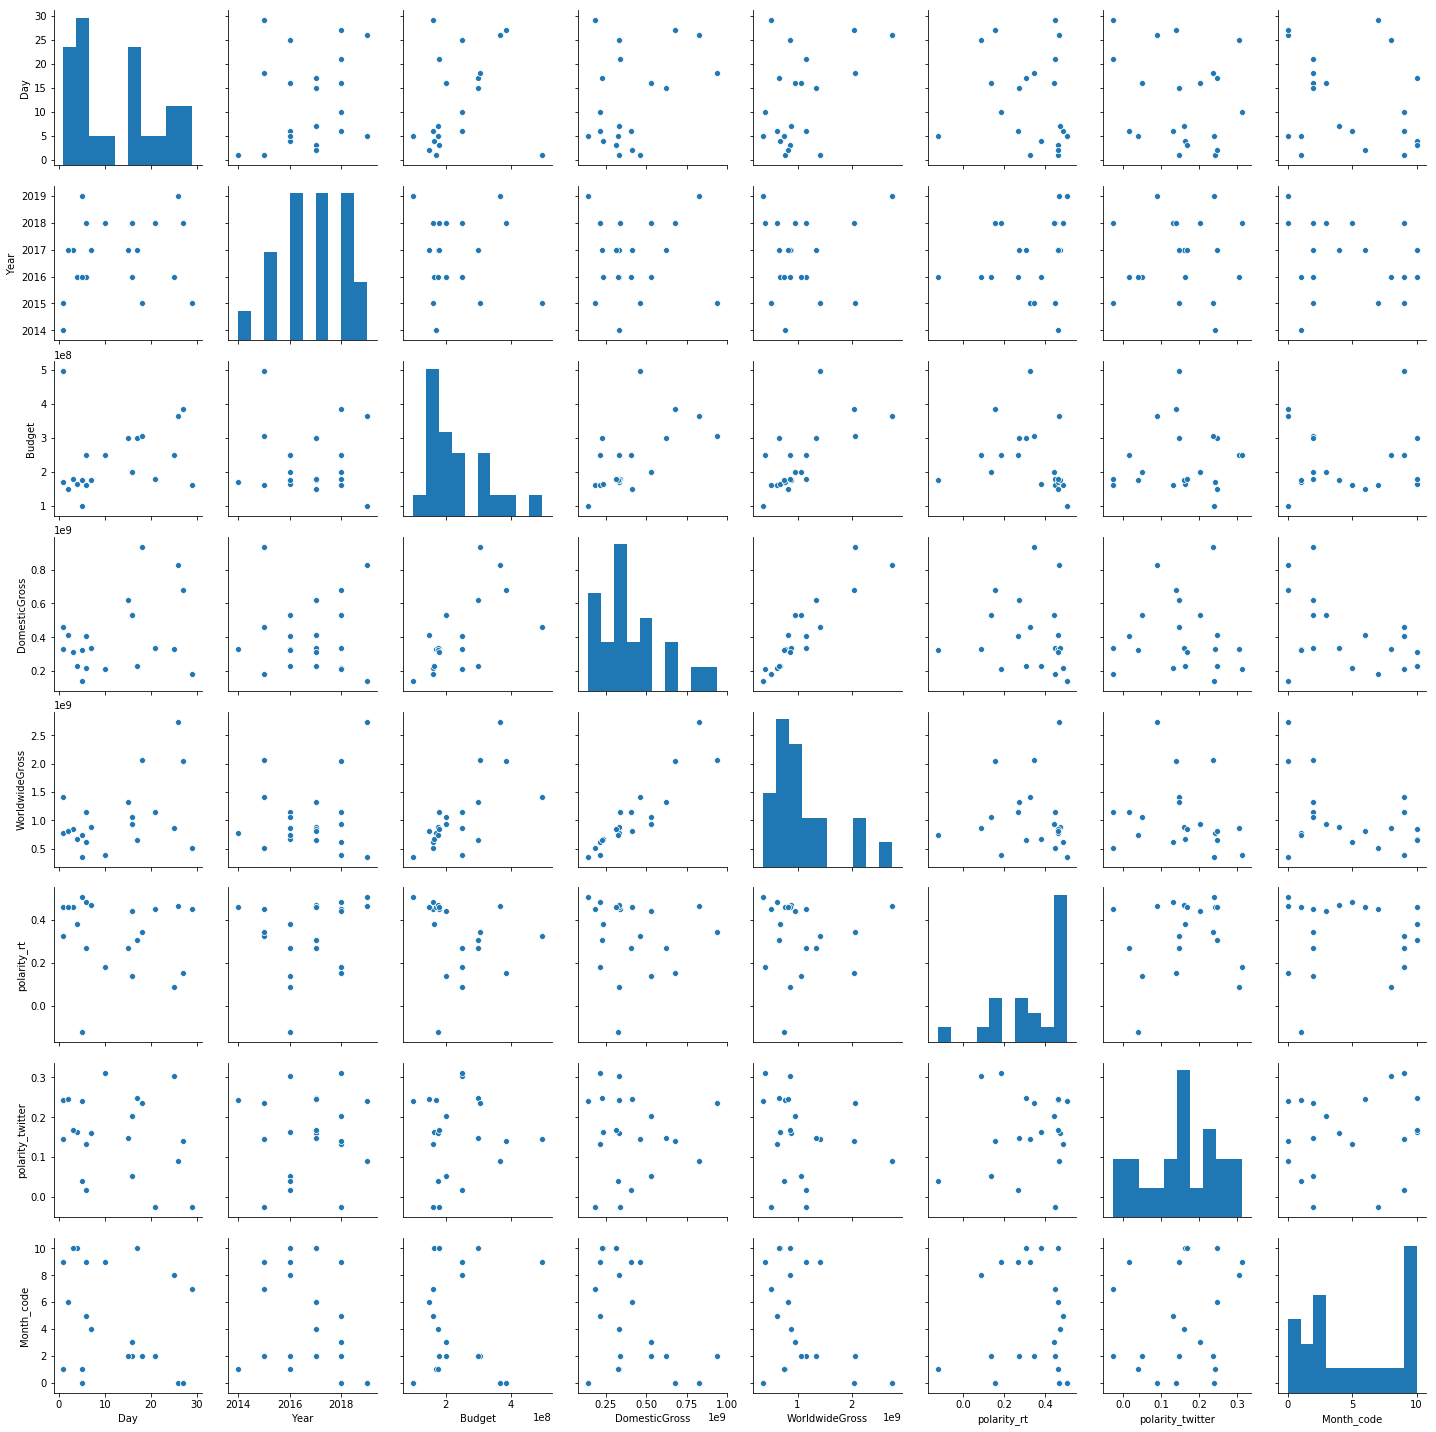

In [49]:
# pairplots showing the relationship and distribution
sns.pairplot(data2)

Data Predictive Model
Model1 - Multiple Linear Regression

In [0]:
# create training and test datasets
np.random.seed(1234)
data2['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(data2))
data2_train = data2[data2['runiform'] >= 0.33]
data2_test = data2[data2['runiform'] < 0.33]

In [51]:
# check training data frame
print('\SusItems_train data frame (rows, columns): ',data2_train.shape)
print(data2_train.head())

\SusItems_train data frame (rows, columns):  (17, 13)
                FullMovieName Month  ...  Month_code  runiform
1                     Ant-man  June  ...           7  0.622109
2                     Aquaman   Dec  ...           2  0.437728
3        Ant-man and the wasp  July  ...           5  0.785359
4            Avengers Endgame   Apr  ...           0  0.779976
7  Captain America: Civil War   May  ...           9  0.801872

[5 rows x 13 columns]


In [52]:
# check test data frame
print('\SusItems_test data frame (rows, columns): ',data2_test.shape)
print(data2_test.head())

\SusItems_test data frame (rows, columns):  (4, 13)
                           FullMovieName Month  ...  Month_code  runiform
0                Avengers: Age of Ultron   May  ...           9  0.191519
5                   Avengers InfinityWar   Apr  ...           0  0.272593
6                          Black Panther   Feb  ...           3  0.276464
17  Star Wars Ep. VII: The Force Awakens   Dec  ...           2  0.013768

[4 rows x 13 columns]


In [53]:
data2_train.dtypes

FullMovieName        object
Month                object
Day                   int64
Year                  int64
Budget                int64
DomesticGross         int64
WorldwideGross        int64
Universe             object
Movie                object
polarity_rt         float64
polarity_twitter    float64
Month_code            int64
runiform            float64
dtype: object

In [54]:
# review results for each row
# specify a simple model
my_model = str('WorldwideGross ~ Budget+polarity_twitter+polarity_rt+Month+Universe')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = data2).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         WorldwideGross   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     2.705
Date:                Sat, 22 Jun 2019   Prob (F-statistic):              0.138
Time:                        14:11:57   Log-Likelihood:                -430.36
No. Observations:                  21   AIC:                             892.7
Df Residuals:                       5   BIC:                             909.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          2.12e+08   5.36e+08  

In [55]:
# review results for each row
# specify a simple model
my_model = str('WorldwideGross ~ Budget+polarity_twitter+polarity_rt+Month')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = data2).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         WorldwideGross   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     2.407
Date:                Sat, 22 Jun 2019   Prob (F-statistic):              0.124
Time:                        14:11:57   Log-Likelihood:                -435.72
No. Observations:                  21   AIC:                             899.4
Df Residuals:                       7   BIC:                             914.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.435e+08   5.75e+08  

In [56]:
# review results for each row
# specify a simple model
my_model = str('WorldwideGross ~ Budget+polarity_twitter+Month')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = data2).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         WorldwideGross   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     2.585
Date:                Sat, 22 Jun 2019   Prob (F-statistic):             0.0924
Time:                        14:11:57   Log-Likelihood:                -436.93
No. Observations:                  21   AIC:                             899.9
Df Residuals:                       8   BIC:                             913.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.425e+08   4.71e+08  

In [57]:
# review results by variables
# specify a simple model
my_model = str('WorldwideGross ~ C(DomesticGross) + C(Budget) + C(polarity_twitter)')

# fit the model to the training set
train_model_fit = smf.ols(my_model, data = data2).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:         WorldwideGross   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Sat, 22 Jun 2019   Prob (F-statistic):                nan
Time:                        14:11:57   Log-Likelihood:                 253.97
No. Observations:                  21   AIC:                            -465.9
Df Residuals:                       0   BIC:                            -444.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1549: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1550: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1558: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning:

divide by zero encountered in double_scalars



**Poor model result**

**Model 2 - Mixed Linear Model Regression**

In [58]:
import statsmodels.formula.api as smf
# include conference_code as a classifier
model2 = smf.mixedlm("WorldwideGross ~  Budget + polarity_twitter + polarity_rt", data2, groups=data2["Month_code"])

model2f = model2.fit()

print(model2f.summary())

                             Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          WorldwideGross         
No. Observations:          21               Method:                      REML                   
No. Groups:                11               Scale:                       137270632355567616.0000
Min. group size:           1                Likelihood:                  -381.9018              
Max. group size:           4                Converged:                   Yes                    
Mean group size:           1.9                                                                  
------------------------------------------------------------------------------------------------
                         Coef.            Std.Err.     z    P>|z|      [0.025         0.975]    
------------------------------------------------------------------------------------------------
Intercept                -66592652.218 359434006.747 -0.185 

In [59]:
import statsmodels.formula.api as smf
# include conference_code as a classifier
model2 = smf.mixedlm("WorldwideGross ~  Budget + polarity_twitter + polarity_rt", data2, groups=data2["Movie"])

model2f = model2.fit()

print(model2f.summary())

                              Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          WorldwideGross         
No. Observations:           21               Method:                      REML                   
No. Groups:                 20               Scale:                       144480988312833792.0000
Min. group size:            1                Likelihood:                  -382.5213              
Max. group size:            2                Converged:                   Yes                    
Mean group size:            1.1                                                                  
-------------------------------------------------------------------------------------------------
                         Coef.            Std.Err.      z    P>|z|      [0.025         0.975]    
-------------------------------------------------------------------------------------------------
Intercept                -12103215.958  397330718.

Model: WorldwideGross = 2.638 * DomesticGross - 0.513 * Budget - 570110841.325 * polarity_twitter - 184143979.376 * polarity_rt + 195203030.258

In [60]:
import statsmodels.formula.api as smf
# include conference_code as a classifier
model2 = smf.mixedlm("DomesticGross ~ Budget + polarity_twitter + polarity_rt", data2, groups=data2["Month_code"])

model2f = model2.fit()

print(model2f.summary())

                            Mixed Linear Model Regression Results
Model:                     MixedLM         Dependent Variable:         DomesticGross         
No. Observations:          21              Method:                     REML                  
No. Groups:                11              Scale:                      23831750489900208.0000
Min. group size:           1               Likelihood:                 -367.2586             
Max. group size:           4               Converged:                  Yes                   
Mean group size:           1.9                                                               
---------------------------------------------------------------------------------------------
                        Coef.            Std.Err.     z    P>|z|     [0.025         0.975]   
---------------------------------------------------------------------------------------------
Intercept                55415571.934 151630649.295  0.365 0.715 -241775039.637 35260618

Model: DomesticGross = 0.128 * Budget - 13196882.574 * polarity_twitter - 179606555.662 * polarity_rt + 406603166.043

In [61]:
data2

,FullMovieName,Month,Day,Year,Budget,DomesticGross,WorldwideGross,Universe,Movie,polarity_rt,polarity_twitter,Month_code,runiform
0,Avengers: Age of Ultron,May,1,2015,495000000,459005868,1405403694,MCU,AgeofUltron,0.325920,0.145708,9,0.191519
1,Ant-man,June,29,2015,160000000,180202163,519311965,MCU,Antman,0.447856,-0.026944,7,0.622109
2,Aquaman,Dec,21,2018,180000000,335061807,1147761807,MCU,Antman,0.447856,-0.026944,2,0.437728
3,Ant-man and the wasp,July,6,2018,162000000,216648740,622674139,MCU,Antmanthewasp,0.483780,0.131781,5,0.785359
4,Avengers Endgame,Apr,26,2019,365000000,827811359,2734786099,MCU,AvengersEndgame,0.464424,0.089621,0,0.779976
5,Avengers InfinityWar,Apr,27,2018,385000000,678815482,2048359754,MCU,AvengersInfinityWar,0.155448,0.139388,0,0.272593
6,Black Panther,Feb,16,2018,200000000,530851601,944951601,MCU,BlackPanther,0.441759,0.203379,3,0.276464
7,Captain America: Civil War,May,6,2016,250000000,408084349,1153304495,MCU,CivilWar,0.267807,0.015877,9,0.801872
8,Batman v Superman: Dawn of Justice,Mar,25,2016,250000000,330360194,868160194,DCEU,DawnofJustice,0.090210,0.304407,8,0.958139
9,Doctor Strange,Nov,4,2016,165000000,232641920,677541920,MCU,DoctorStrange,0.379982,0.161916,10,0.875933


Time Series Prediction

In [0]:
data3=data2.copy()

In [0]:
data3['Month'] = data3['Month'].map({'May': 5, 'June': 6, 'Dec': 12, 'July': 7, 'Apr': 4, 'Feb': 2, 'Nov': 11, 'Jul': 7, 'Aug': 8, 'Jun': 6, 'Mar': 3})

In [64]:
data3

,FullMovieName,Month,Day,Year,Budget,DomesticGross,WorldwideGross,Universe,Movie,polarity_rt,polarity_twitter,Month_code,runiform
0,Avengers: Age of Ultron,5,1,2015,495000000,459005868,1405403694,MCU,AgeofUltron,0.325920,0.145708,9,0.191519
1,Ant-man,6,29,2015,160000000,180202163,519311965,MCU,Antman,0.447856,-0.026944,7,0.622109
2,Aquaman,12,21,2018,180000000,335061807,1147761807,MCU,Antman,0.447856,-0.026944,2,0.437728
3,Ant-man and the wasp,7,6,2018,162000000,216648740,622674139,MCU,Antmanthewasp,0.483780,0.131781,5,0.785359
4,Avengers Endgame,4,26,2019,365000000,827811359,2734786099,MCU,AvengersEndgame,0.464424,0.089621,0,0.779976
5,Avengers InfinityWar,4,27,2018,385000000,678815482,2048359754,MCU,AvengersInfinityWar,0.155448,0.139388,0,0.272593
6,Black Panther,2,16,2018,200000000,530851601,944951601,MCU,BlackPanther,0.441759,0.203379,3,0.276464
7,Captain America: Civil War,5,6,2016,250000000,408084349,1153304495,MCU,CivilWar,0.267807,0.015877,9,0.801872
8,Batman v Superman: Dawn of Justice,3,25,2016,250000000,330360194,868160194,DCEU,DawnofJustice,0.090210,0.304407,8,0.958139
9,Doctor Strange,11,4,2016,165000000,232641920,677541920,MCU,DoctorStrange,0.379982,0.161916,10,0.875933


In [0]:
from datetime import datetime
data3['Date'] = data3.apply(lambda row: datetime(
                              row['Year'], row['Month'], row['Day']), axis=1)

In [66]:
data3

,FullMovieName,Month,Day,Year,Budget,DomesticGross,WorldwideGross,Universe,Movie,polarity_rt,polarity_twitter,Month_code,runiform,Date
0,Avengers: Age of Ultron,5,1,2015,495000000,459005868,1405403694,MCU,AgeofUltron,0.325920,0.145708,9,0.191519,2015-05-01
1,Ant-man,6,29,2015,160000000,180202163,519311965,MCU,Antman,0.447856,-0.026944,7,0.622109,2015-06-29
2,Aquaman,12,21,2018,180000000,335061807,1147761807,MCU,Antman,0.447856,-0.026944,2,0.437728,2018-12-21
3,Ant-man and the wasp,7,6,2018,162000000,216648740,622674139,MCU,Antmanthewasp,0.483780,0.131781,5,0.785359,2018-07-06
4,Avengers Endgame,4,26,2019,365000000,827811359,2734786099,MCU,AvengersEndgame,0.464424,0.089621,0,0.779976,2019-04-26
5,Avengers InfinityWar,4,27,2018,385000000,678815482,2048359754,MCU,AvengersInfinityWar,0.155448,0.139388,0,0.272593,2018-04-27
6,Black Panther,2,16,2018,200000000,530851601,944951601,MCU,BlackPanther,0.441759,0.203379,3,0.276464,2018-02-16
7,Captain America: Civil War,5,6,2016,250000000,408084349,1153304495,MCU,CivilWar,0.267807,0.015877,9,0.801872,2016-05-06
8,Batman v Superman: Dawn of Justice,3,25,2016,250000000,330360194,868160194,DCEU,DawnofJustice,0.090210,0.304407,8,0.958139,2016-03-25
9,Doctor Strange,11,4,2016,165000000,232641920,677541920,MCU,DoctorStrange,0.379982,0.161916,10,0.875933,2016-11-04


In [0]:
data3_MCU = data3[data3['Universe'].str.contains("MCU")]
data3_DCEU = data3[data3['Universe'].str.contains("DCEU")]
data3_STAR = data3[data3['Universe'].str.contains("STAR")]

In [68]:
data3_MCU = data3_MCU[['Date','WorldwideGross']]
data3_MCU

,Date,WorldwideGross
0,2015-05-01,1405403694
1,2015-06-29,519311965
2,2018-12-21,1147761807
3,2018-07-06,622674139
4,2019-04-26,2734786099
5,2018-04-27,2048359754
6,2018-02-16,944951601
7,2016-05-06,1153304495
9,2016-11-04,677541920
10,2014-08-01,771051335


In [69]:
#update the column names to run Prophet
data3_MCU = data3_MCU.rename(index=str, columns={"WorldwideGross": "y", "Date": "ds"})
data3_MCU.head()

,ds,y
0,2015-05-01,1405403694
1,2015-06-29,519311965
2,2018-12-21,1147761807
3,2018-07-06,622674139
4,2019-04-26,2734786099


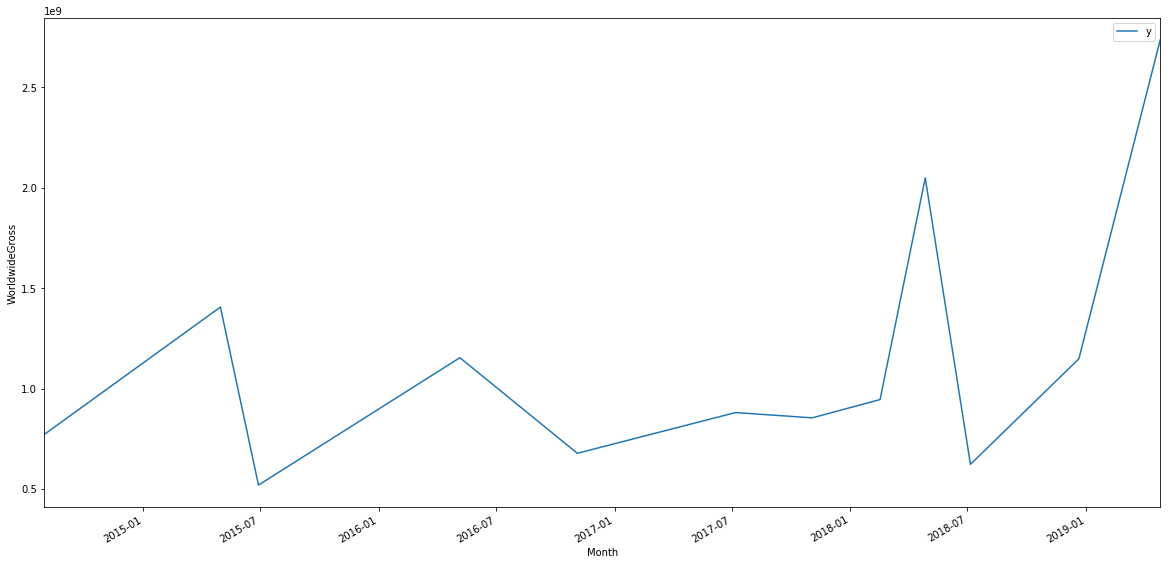

In [70]:
#This graph shows how the box office results present over the years.
ax = data3_MCU.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('WorldwideGross')
ax.set_xlabel('Month')

plt.show()

In [71]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(data3_MCU)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 8.


In [72]:
#set prediction periods to 13 months
future_dates = bev_model.make_future_dataframe(periods=13, freq='M')
future_dates.tail()

,ds
20,2019-12-31
21,2020-01-31
22,2020-02-29
23,2020-03-31
24,2020-04-30


In [73]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
20,2019-12-31,5.603681e+09,5.601401e+09,5.605828e+09
21,2020-01-31,-1.674052e+10,-1.674331e+10,-1.673784e+10
22,2020-02-29,4.350726e+10,4.350411e+10,4.351030e+10
23,2020-03-31,1.961097e+10,1.960741e+10,1.961441e+10
24,2020-04-30,1.702343e+09,1.698374e+09,1.706135e+09


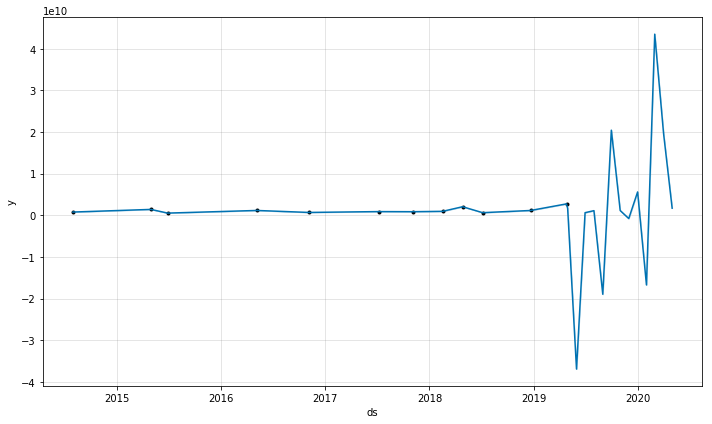

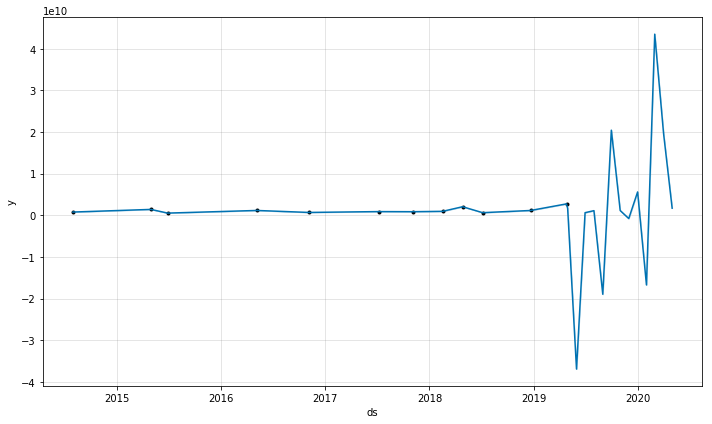

In [74]:
# MODEL
# the data trend and predition periods
bev_model.plot(forecast, uncertainty=True)

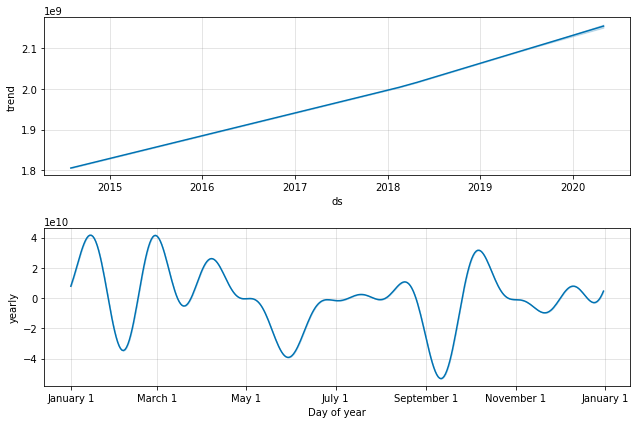

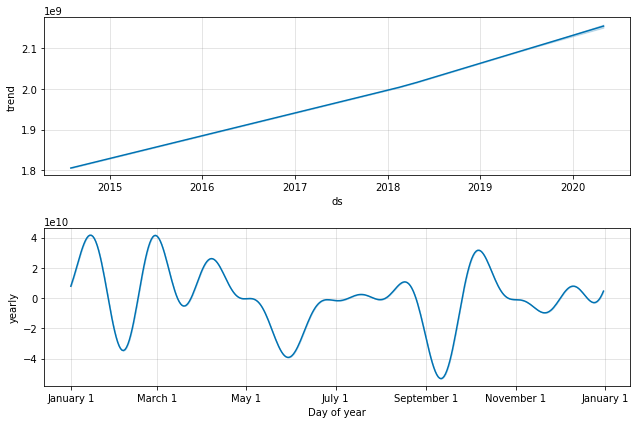

In [75]:
# The first graph shows how the trend for box office results over the years. 
# The second graph shows how the box office results differred in the same month but different years.
bev_model.plot_components(forecast)

In [76]:
data3_DCEU = data3_DCEU[['Date','WorldwideGross']]
data3_DCEU

,Date,WorldwideGross
8,2016-03-25,868160194
11,2017-11-17,655906448
13,2019-04-05,363030393
16,2016-08-05,746100054
20,2017-06-02,817012815


In [77]:
#update the column names to run Prophet
data3_DCEU = data3_DCEU.rename(index=str, columns={"WorldwideGross": "y", "Date": "ds"})
data3_DCEU.head()

,ds,y
8,2016-03-25,868160194
11,2017-11-17,655906448
13,2019-04-05,363030393
16,2016-08-05,746100054
20,2017-06-02,817012815


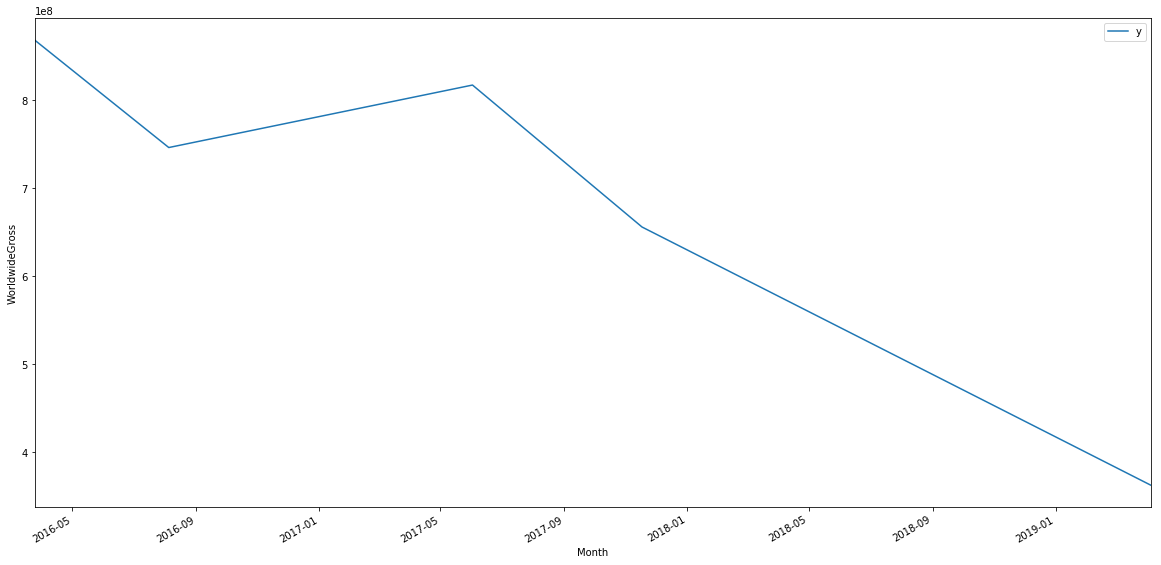

In [78]:
#This graph shows how the box office results present over the years.
ax = data3_DCEU.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('WorldwideGross')
ax.set_xlabel('Month')

plt.show()

In [79]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(data3_DCEU)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.


In [80]:
#set prediction periods to 13 months
future_dates = bev_model.make_future_dataframe(periods=13, freq='M')
future_dates.tail()

,ds
13,2019-12-31
14,2020-01-31
15,2020-02-29
16,2020-03-31
17,2020-04-30


In [81]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
13,2019-12-31,1.203842e+09,1.203842e+09,1.203842e+09
14,2020-01-31,2.145360e+09,2.145360e+09,2.145360e+09
15,2020-02-29,-4.514918e+08,-4.514918e+08,-4.514918e+08
16,2020-03-31,1.003504e+09,1.003504e+09,1.003504e+09
17,2020-04-30,6.444916e+09,6.444916e+09,6.444916e+09


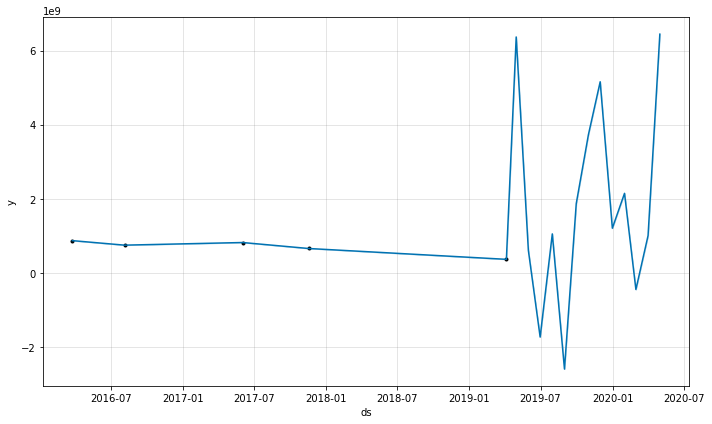

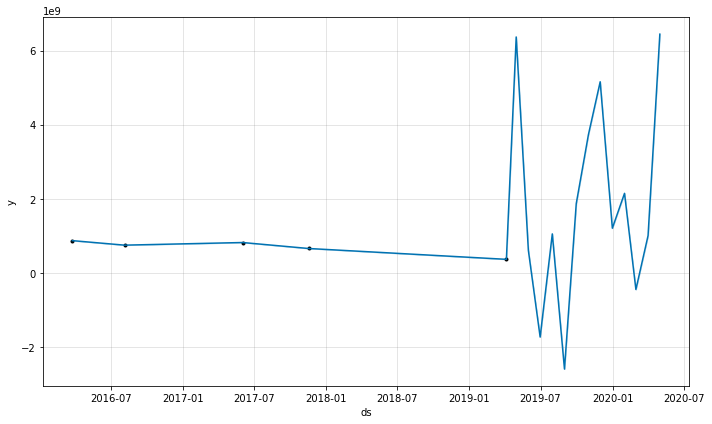

In [82]:
# MODEL
# the data trend and predition periods
bev_model.plot(forecast, uncertainty=True)

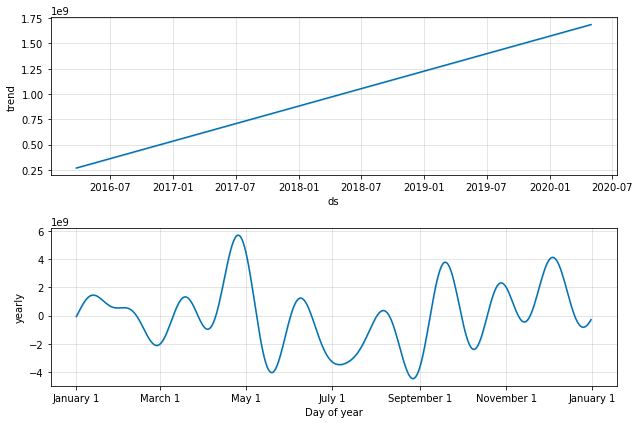

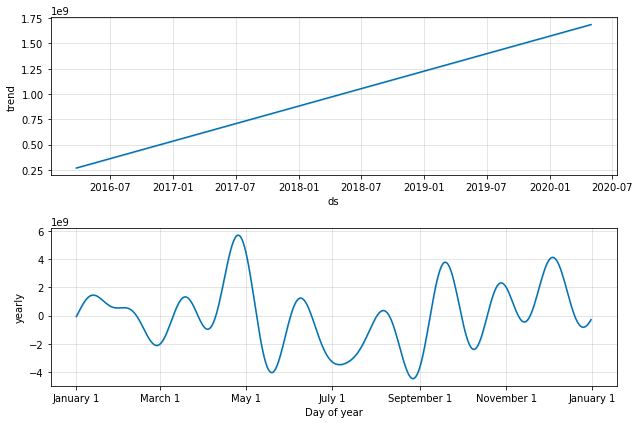

In [83]:
# The first graph shows how the trend for box office results over the years. 
# The second graph shows how the box office results differred in the same month but different years.
bev_model.plot_components(forecast)

In [84]:
data3_STAR = data3_STAR[['Date','WorldwideGross']]
data3_STAR

,Date,WorldwideGross
12,2016-12-16,1056057273
14,2018-05-10,392924807
17,2015-12-18,2058662225
18,2017-12-15,1332539889


In [85]:
#update the column names to run Prophet
data3_STAR = data3_STAR.rename(index=str, columns={"WorldwideGross": "y", "Date": "ds"})
data3_STAR.head()

,ds,y
12,2016-12-16,1056057273
14,2018-05-10,392924807
17,2015-12-18,2058662225
18,2017-12-15,1332539889


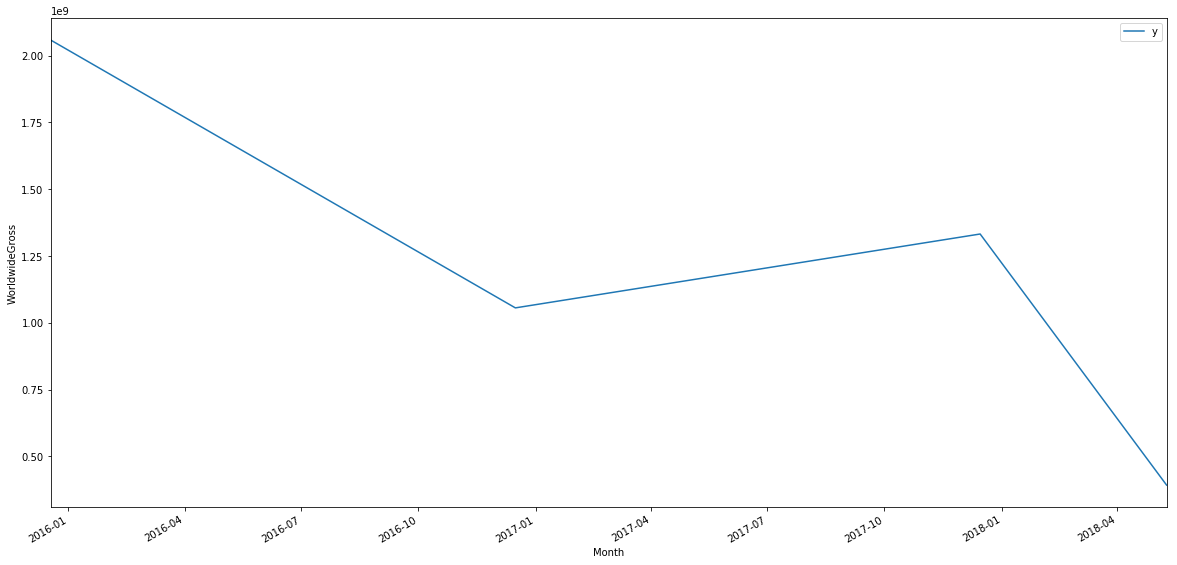

In [86]:
#This graph shows how the box office results present over the years.
ax = data3_STAR.set_index('ds').plot(figsize=(20, 10))
ax.set_ylabel('WorldwideGross')
ax.set_xlabel('Month')

plt.show()

In [87]:
# MODEL
# Set the uncertainty interval to 95% (the Prophet default is 80%)

bev_model = Prophet(interval_width=0.95)
bev_model.fit(data3_STAR)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 2.


In [88]:
#set prediction periods to 13 months
future_dates = bev_model.make_future_dataframe(periods=13, freq='M')
future_dates.tail()

,ds
12,2019-01-31
13,2019-02-28
14,2019-03-31
15,2019-04-30
16,2019-05-31


In [89]:
# MODEL

forecast = bev_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
12,2019-01-31,5.226434e+09,5.174996e+09,5.287240e+09
13,2019-02-28,-3.996487e+10,-4.002600e+10,-3.988989e+10
14,2019-03-31,5.448777e+10,5.441289e+10,5.457189e+10
15,2019-04-30,-1.675609e+10,-1.684167e+10,-1.665802e+10
16,2019-05-31,-8.153469e+09,-8.249625e+09,-8.041839e+09


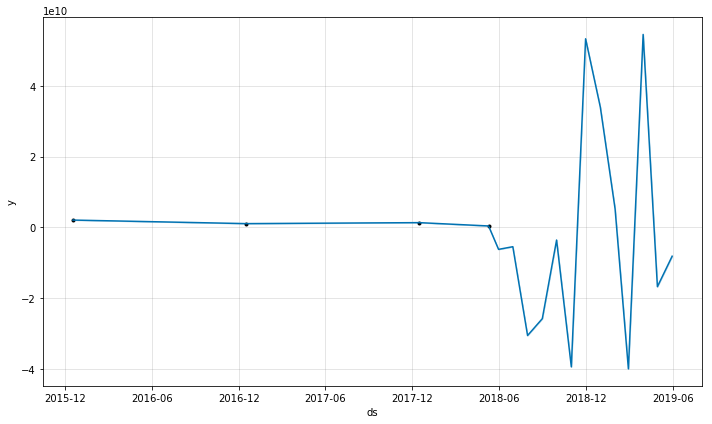

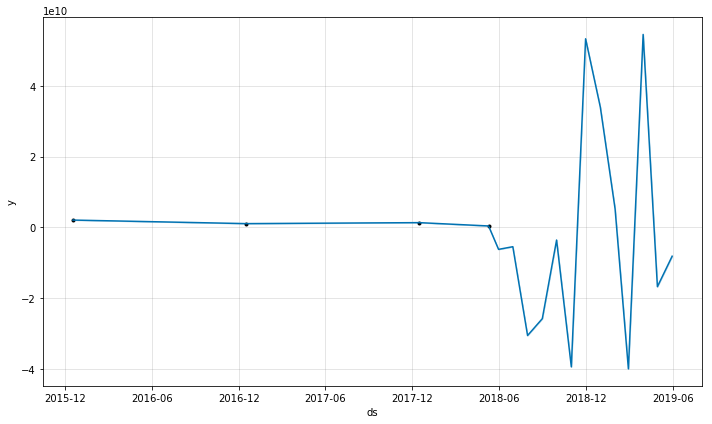

In [90]:
# MODEL
# the data trend and predition periods
bev_model.plot(forecast, uncertainty=True)

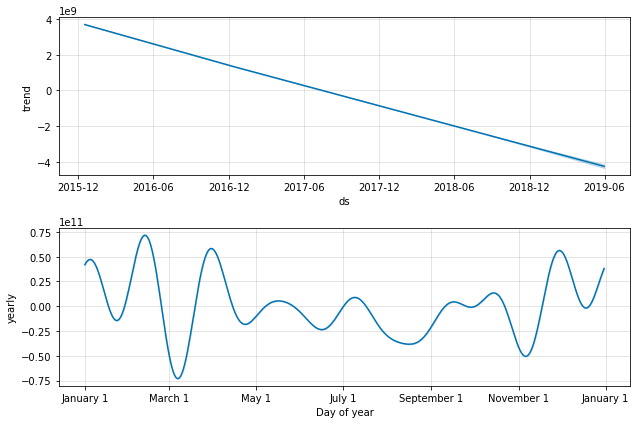

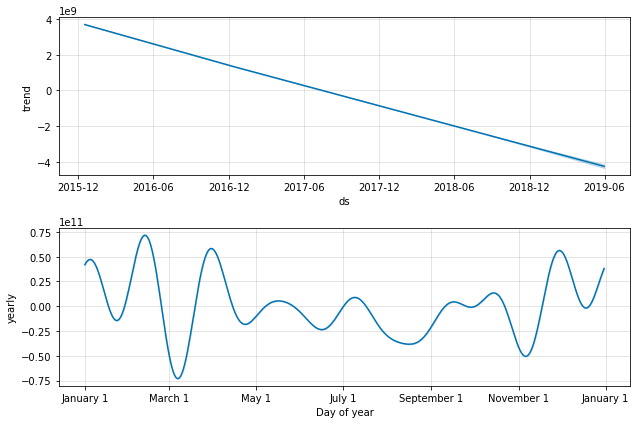

In [91]:
# The first graph shows how the trend for box office results over the years. 
# The second graph shows how the box office results differred in the same month but different years.
bev_model.plot_components(forecast)

Multi-Class Text Classification with Scikit-Learn

In [92]:
missing_values = ["n/a", "na", "--"]
rt = pd.read_csv("https://raw.githubusercontent.com/rmcelfresh/IST718FinalProject/master/rottentomato.csv", na_values = missing_values)
rt = rt[['Movie','text']]
rt.head()

,Movie,text
0,AgeofUltron,"Fans of the franchise will be pleased, but tho..."
1,AgeofUltron,"""Avengers: Age of Ultron"" is a sometimes daffy..."
2,AgeofUltron,"More does not necessarily equal better; here, ..."
3,AgeofUltron,"The sharp, interpersonal dramedy that made the..."
4,AgeofUltron,"For the most part, ""Avengers: Age of Ultron"" i..."


In [93]:
missing_values = ["n/a", "na", "--"]
twitter = pd.read_csv("https://raw.githubusercontent.com/rmcelfresh/IST718FinalProject/master/tweets.csv", na_values = missing_values)
twitter = twitter[['Movie','clean_text']]
twitter = twitter.rename(index=str, columns={"clean_text": "text"})
twitter.head()

,Movie,text
0,AgeofUltron,RT brutasha_endgam Here 's `` n't turn green `...
1,AgeofUltron,AvengersAgeOfUltron easy watch events infinity...
2,AgeofUltron,RT brutasha_endgam Here 's `` n't turn green `...
3,AgeofUltron,RT brutasha_endgam Here 's `` n't turn green `...
4,AgeofUltron,RT Marvel_Informer Who else got goosebumps lin...


In [94]:
text_data = pd.concat([rt, twitter], ignore_index=False)
text_data.head()

,Movie,text
0,AgeofUltron,"Fans of the franchise will be pleased, but tho..."
1,AgeofUltron,"""Avengers: Age of Ultron"" is a sometimes daffy..."
2,AgeofUltron,"More does not necessarily equal better; here, ..."
3,AgeofUltron,"The sharp, interpersonal dramedy that made the..."
4,AgeofUltron,"For the most part, ""Avengers: Age of Ultron"" i..."


In [0]:
text_data['category_id'] = text_data['Movie'].factorize()[0]
from io import StringIO
category_id_df = text_data[['Movie', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Movie']].values)

In [96]:
text_data.head()

,Movie,text,category_id
0,AgeofUltron,"Fans of the franchise will be pleased, but tho...",0
1,AgeofUltron,"""Avengers: Age of Ultron"" is a sometimes daffy...",0
2,AgeofUltron,"More does not necessarily equal better; here, ...",0
3,AgeofUltron,"The sharp, interpersonal dramedy that made the...",0
4,AgeofUltron,"For the most part, ""Avengers: Age of Ultron"" i...",0


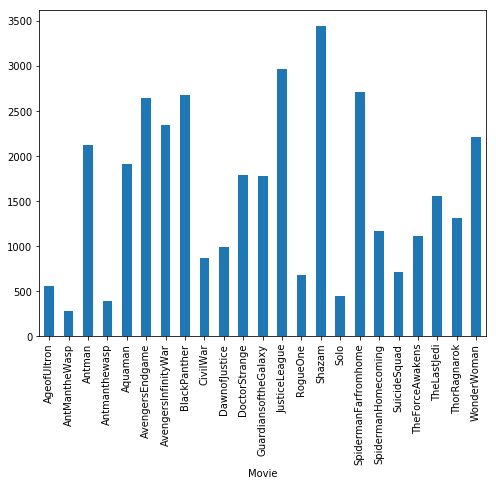

In [97]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
text_data.groupby('Movie').text.count().plot.bar(ylim=0)
plt.show()

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(text_data.Movie).toarray()
labels = text_data.category_id
features.shape

(36668, 22)

In [99]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Movie, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Movie))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'AgeofUltron':
  . Most correlated unigrams:
       . shazam
       . ageofultron
  . Most correlated bigrams:
       . 
# 'AntMantheWasp':
  . Most correlated unigrams:
       . shazam
       . antmanthewasp
  . Most correlated bigrams:
       . 
# 'Antman':
  . Most correlated unigrams:
       . shazam
       . antman
  . Most correlated bigrams:
       . 
# 'Antmanthewasp':
  . Most correlated unigrams:
       . shazam
       . antmanthewasp
  . Most correlated bigrams:
       . 
# 'Aquaman':
  . Most correlated unigrams:
       . shazam
       . aquaman
  . Most correlated bigrams:
       . 
# 'AvengersEndgame':
  . Most correlated unigrams:
       . shazam
       . avengersendgame
  . Most correlated bigrams:
       . 
# 'AvengersInfinityWar':
  . Most correlated unigrams:
       . shazam
       . avengersinfinitywar
  . Most correlated bigrams:
       . 
# 'BlackPanther':
  . Most correlated unigrams:
       . shazam
       . blackpanther
  . Most correlated bigrams:
       . 


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(text_data['text'], text_data['Movie'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.values.astype('U'))
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [101]:
print(clf.predict(count_vect.transform(["Revealing the preoccupations of its maker, Guardians of the Galaxy Vol. 2 is a petri dish for Gunn to experiment with the idea of family as a construct."])))

['GuardiansoftheGalaxy']


In [102]:
print(clf.predict(count_vect.transform(["hen you add the unique visuals that a character like this can facilitate, it makes Doctor Strange one of the more interesting entries in Hollywood's 600-lb. gorilla of a franchise."])))

['DoctorStrange']


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist

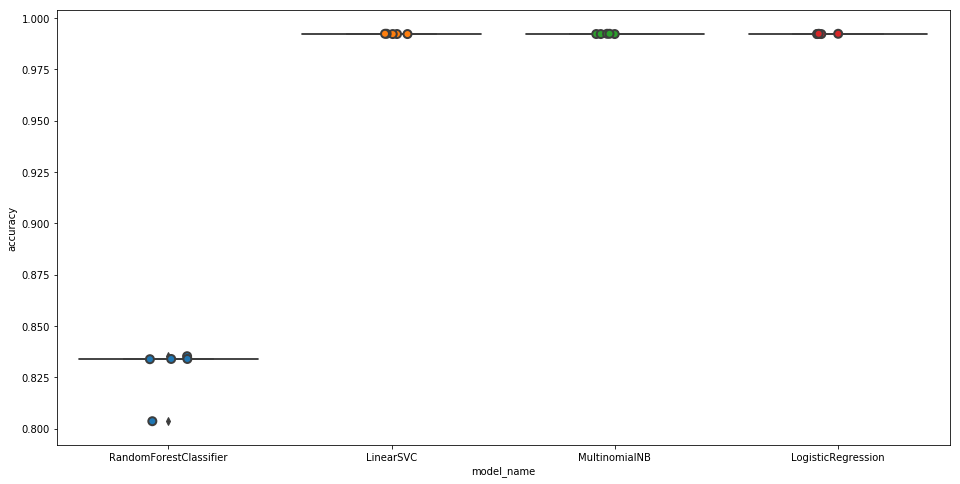

In [104]:
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [105]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.992282
LogisticRegression        0.992282
MultinomialNB             0.992282
RandomForestClassifier    0.828105
Name: accuracy, dtype: float64

More Examples

In [106]:
print(clf.predict(count_vect.transform(["It's clear that [Alden] Ehrenreich is from from having the charisma of the young Harrison Ford, but he manages."])))

['Solo']


In [107]:
print(clf.predict(count_vect.transform(["Ayer has often been a careless writer, and so he is here.."])))
#incorrect - should be SuicideSquad

['TheLastJedi']


In [108]:
print(clf.predict(count_vect.transform(["The fun of The Force Awakens comes from visiting an old friend and finding that little has changed; the excitement is that great performances from all four new leads means it's a strong foundation for whatever comes next."])))

['TheForceAwakens']
